In [16]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True, timeout_ms=300000)

Mounted at /content/drive


In [17]:
import numpy as np
import os

data_dir = "/content/drive/MyDrive/ML_Project/Data"
model_dir = data_dir

y_true      = np.load(os.path.join(model_dir, "y_true_test.npy"))
y_pred_cnn  = np.load(os.path.join(model_dir, "y_pred_test_cnn.npy"))
y_pred_reg = np.load(os.path.join(model_dir, "y_pred_test_regression.npy"))



In [25]:


#first, the inprovement was only 5%. i want to see if it's actually statistically
#significant or just noise. we use confidence interval.

#error
se_cnn  = (y_pred_cnn  - y_true) ** 2
se_reg = (y_pred_reg - y_true) ** 2
d = se_reg - se_cnn

print("Mean(d):", float(np.mean(d)))

# CI with bootstrap to be sure
rng = np.random.RandomState(42)
B = 2000 #2000 fake test sets
n = d.shape[0]
boot_means = np.zeros(B)

for b in range(B):
    idx = rng.randint(0, n, size=n)
    boot_means[b] = float(np.mean(d[idx]))

lo = float(np.percentile(boot_means, 2.5))
hi = float(np.percentile(boot_means, 97.5))

print("95 %CI:" ,lo, hi)

#rmse
rmse_cnn  = float(np.sqrt(np.mean(se_cnn)))
rmse_reg = float(np.sqrt(np.mean(se_base)))
print("RMSE cnn :", rmse_cnn)
print("RMSE base:", rmse_reg)

# simple interpretation
if lo > 0:
    print("cnn better")
elif hi < 0:
    print("regression better")
else:
    print("idk")


Mean(d): 0.1494241127960569
95 %CI: 0.08777754902035804 0.21496227112218605
RMSE cnn : 1.2453923225402832
RMSE base: 1.304003859917295
cnn better


In [26]:
#99%?
lo99 = float(np.percentile(boot_means, 0.5))
hi99 = float(np.percentile(boot_means, 99.5))


if lo99 > 0:
    print("CNN is probably better")
else:
    print("not achived")


CNN is probably better


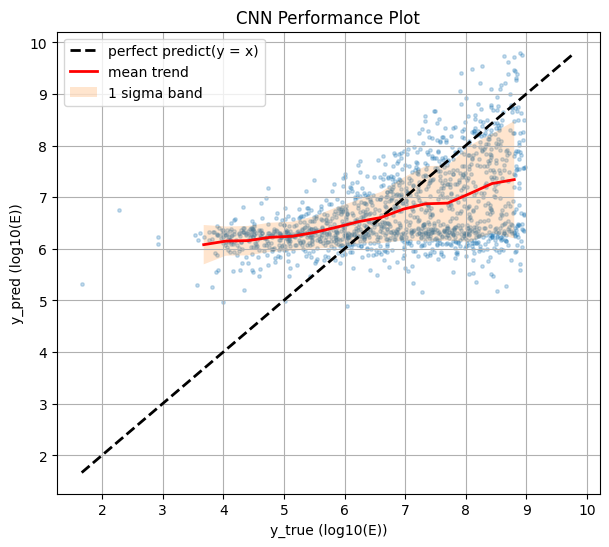

In [29]:

import matplotlib.pyplot as plt


#now, we visualize the inference with a plot IceCube likes

# we plot x axis as real energy, y axis as prediction. so in the perfect world
#where prediction is completely correct, we get a pure linear relationship y = x


plt.figure(figsize=(7,6))
plt.scatter(y_true, y_pred_cnn, s = 6, alpha = 0.25)

#perfect line
mn = float(min(y_true.min(), y_pred_cnn.min()))
mx = float(max(y_true.max(), y_pred_cnn.max()))
plt.plot([mn, mx], [mn, mx], "k--", linewidth = 2, label = "perfect predict(y = x)")


nbins = 20
edges = np.linspace(y_true.min(), y_true.max(), nbins + 1)

x_centers = []
y_mean = []
y_std = []

for b in range(nbins):
    lo = edges[b]
    hi = edges[b+1]


    mask = (y_true >= lo) & (y_true < hi)
    vals = y_pred_cnn[mask]

    if vals.size < 5:
        continue

    xc = 0.5 * (lo + hi)
    x_centers.append(xc)
    y_mean.append(float(vals.mean()))
    y_std.append(float(vals.std()))



x_centers = np.array(x_centers)
y_mean = np.array(y_mean)
y_std = np.array(y_std)

# bias curve
plt.plot(x_centers, y_mean, "r-", linewidth = 2, label = "mean trend")#we see the trend of our prediction to see how bad we are

# resolution
plt.fill_between(x_centers, y_mean - y_std, y_mean + y_std, alpha = 0.2, label = "1 sigma band") #we plot +- 1 std to see how bad we are

plt.xlabel("y_true (log10(E))")
plt.ylabel("y_pred (log10(E))")
plt.title("CNN Performance Plot")
plt.grid(True)
plt.legend()
plt.show()

#we are pretty bad



